In [7]:
import pandas as pd

# 1. Loading the data
df = pd.read_csv('amazon.csv')

# 2. Defining a helper to strip symbols
def clean_currency(value):
    if isinstance(value, str):
        # Removing currency symbol (₹) and commas
        return value.replace('₹', '').replace(',', '')
    return value

# 3. Clean Prices: Turning "₹1,099" into 1099.0
df['actual_price'] = df['actual_price'].apply(clean_currency).astype(float)
df['discounted_price'] = df['discounted_price'].apply(clean_currency).astype(float)

# 4. Clean Percentage: Turning "64%" into 64.0
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# 5. Clean Ratings: Removing any corrupted text and make it a number
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 6. Clean Rating Count: Turning "24,269" into 24269.0
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

# 7. Final Polish: Dropping any rows that are still missing a rating or price
df_clean = df.dropna(subset=['actual_price', 'rating'])

# Saving the cleaned version
df_clean.to_csv('amazon_cleaned.csv', index=False)

Using the cleaned dataset for EDA

The Correlation is: 0.12164167545801745


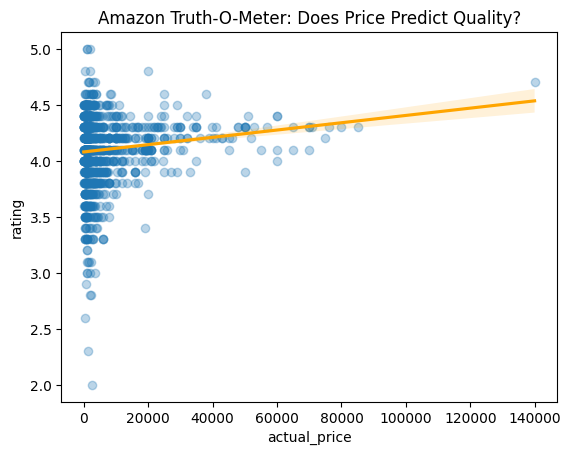

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loading the cleaned data
df = pd.read_csv('amazon_cleaned.csv')

# 2. Calculating the math (Correlation)
corr_value = df['actual_price'].corr(df['rating'])
print(f"The Correlation is: {corr_value}")

# 3. Creating the 'Truth-O-Meter' Visual
sns.regplot(data=df, x='actual_price', y='rating',
            scatter_kws={'alpha':0.3}, # Makes dots transparent so we see density
            line_kws={'color':'orange'}) # The 'Trend' line

plt.title('Amazon Truth-O-Meter: Does Price Predict Quality?')
plt.show()

Building the Linear Regression Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Preparing X (Inputs) and y (What we want to predict)
X = df[['actual_price', 'discount_percentage']]
y = df['rating']

# 2. Split: Using 80% to 'teach' the model and 20% to 'test' it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Viewing the Impact
print(f"Price Impact: {model.coef_[0]}")
print(f"Discount Impact: {model.coef_[1]}")

Price Impact: 3.00805250187592e-06
Discount Impact: -0.001986525395828232
